In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'Datos/Precios Mandarina Oneco.xlsx'

df = pd.read_excel(path,
              index_col='Fecha',
              parse_dates=True
             )
df.index.freq='MS'


df.head()

,Promedio de precio mensual mayorista
Fecha,
2017-01-01,2500
2017-02-01,3375
2017-03-01,3075
2017-04-01,2650
2017-05-01,2450


In [3]:
# Defino Variables

df.rename(columns = {'Promedio de precio mensual mayorista': 'precio_COP'}, inplace = True)
df.head()

,precio_COP
Fecha,
2017-01-01,2500
2017-02-01,3375
2017-03-01,3075
2017-04-01,2650
2017-05-01,2450


<AxesSubplot:xlabel='Fecha'>

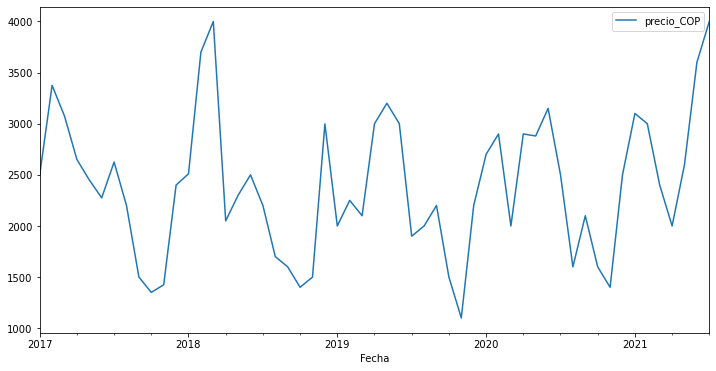

In [4]:
df.plot(figsize=(12,6))

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

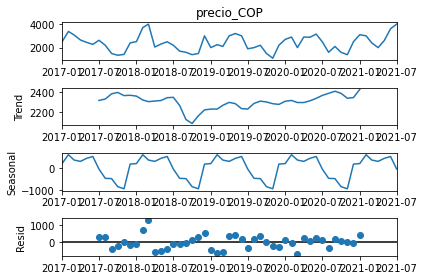

In [6]:
results = seasonal_decompose(df['precio_COP'])
results.plot();

No vamos a convertir la serie en estacionaria porque en teoría las predicciones de RNN se pueden adaptar a este patrón, y a diferentes tipos de patrones complejos, que otros modelos más simples no adaptarían.

In [7]:
len(df)

55

In [8]:
train = df.iloc[:45] 
#La parte de entrenamiento van a ser todos los datos excepto últimos 10 meses

test =df.iloc[45:]

print(train.shape,test.shape)


(45, 1) (10, 1)


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Con esta herramienta, convertimos la serie en una escala de 0 a 1



In [10]:
df.head(),df.tail() #Vemos como son los datos.

(            precio_COP
 Fecha                 
 2017-01-01        2500
 2017-02-01        3375
 2017-03-01        3075
 2017-04-01        2650
 2017-05-01        2450,
             precio_COP
 Fecha                 
 2021-03-01        2400
 2021-04-01        2000
 2021-05-01        2600
 2021-06-01        3600
 2021-07-01        4000)

In [11]:
# Tranformamos la serie de entrenamiento y testeo
# Vemos como quedan los primeros 10 datos de entrenamiento.

scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
scaled_train[:10]

array([[0.48275862],
       [0.78448276],
       [0.68103448],
       [0.53448276],
       [0.46551724],
       [0.40517241],
       [0.52586207],
       [0.37931034],
       [0.13793103],
       [0.0862069 ]])

In [12]:
from keras.preprocessing.sequence import TimeseriesGenerator

Init Plugin
Init Graph Optimizer
Init Kernel


In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [14]:
# LSTM usa secuencias de datos para entrenarse 
# Definimos generador
# Al estar hablando de modelos supervisados, debemos decirle al modelo cuales son los input y cuales son los output


n_input = 12 # Este número son los meses de "entrenemiento"
n_features = 1 # Este es el número de series implementadas, en este caso solo es una (Precio_COP)

generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=n_input,
                                batch_size=1)


In [15]:
model = Sequential()

model.add(LSTM(128,activation = 'relu', input_shape= (n_input, n_features), return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 12, 128)           131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 329,857
Trainable params: 329,857
Non-trainable params: 0
_________________________________________________________________


2021-11-22 16:04:46.045274: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-22 16:04:46.045681: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
model.fit_generator(generator,epochs= 50)

Epoch 1/50


/Users/pedroecheverri/miniforge3/envs/tensorflow_env/lib/python3.9/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-11-22 16:04:46.222997: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-22 16:04:46.224366: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-22 16:04:55.848917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 24s 429ms/step - loss: 0.1523
Epoch 2/50
33/33 [==============================] - 14s 428ms/step - loss: 0.0874
Epoch 3/50
33/33 [==============================] - 14s 428ms/step - loss: 0.0498
Epoch 4/50
33/33 [==============================] - 14s 428ms/step - loss: 0.0492
Epoch 5/50
33/33 [==============================] - 14s 429ms/step - loss: 0.0791
Epoch 6/50
33/33 [==============================] - 14s 429ms/step - loss: 0.0734
Epoch 7/50
33/33 [==============================] - 14s 429ms/step - loss: 0.0436
Epoch 8/50
33/33 [==============================] - 14s 429ms/step - loss: 0.0537
Epoch 9/50
33/33 [==============================] - 14s 428ms/step - loss: 0.0532
Epoch 10/50
33/33 [==============================] - 14s 428ms/step - loss: 0.0466
Epoch 11/50
33/33 [==============================] - 14s 429ms/step - loss: 0.0417
Epoch 12/50
33/33 [==============================] - 14s 435ms/step - loss: 0.0751
Epoch 13/50
33/33 [=====

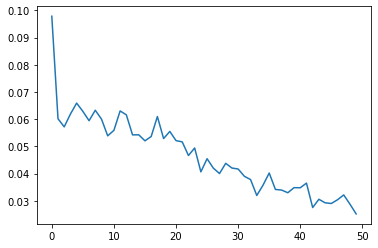

In [17]:
# Vemos como se comportan la función de pérdida.

my_loss= model.history.history['loss']
plt.plot(range(len(my_loss)),my_loss)

In [18]:
first_eval_batch = scaled_train[-12:]
first_eval_batch = first_eval_batch.reshape((1,n_input,n_features))
model.predict(first_eval_batch)

2021-11-22 16:16:45.345195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.1590434]], dtype=float32)

In [19]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]

current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]

    test_predictions.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis= 1)

In [20]:
test_predictions

[array([0.1590434], dtype=float32),
 array([0.1225109], dtype=float32),
 array([0.2621861], dtype=float32),
 array([0.42167947], dtype=float32),
 array([0.50429183], dtype=float32),
 array([0.45031363], dtype=float32),
 array([0.5727191], dtype=float32),
 array([0.56890756], dtype=float32),
 array([0.5554151], dtype=float32),
 array([0.35607234], dtype=float32)]

In [21]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions


array([[1561.22586429],
       [1455.28159589],
       [1860.33971906],
       [2322.87045419],
       [2562.4463141 ],
       [2405.90952039],
       [2760.8853817 ],
       [2749.83192086],
       [2710.70377231],
       [2132.60977566]])

In [22]:
test['Predictions'] =true_predictions
test.head()

/var/folders/nc/q_wx5s2168v477f_1tb20rcr0000gn/T/ipykernel_903/546410347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] =true_predictions


,precio_COP,Predictions
Fecha,,
2020-10-01,1600,1561.225864
2020-11-01,1400,1455.281596
2020-12-01,2500,1860.339719
2021-01-01,3100,2322.870454
2021-02-01,3000,2562.446314


<AxesSubplot:xlabel='Fecha'>

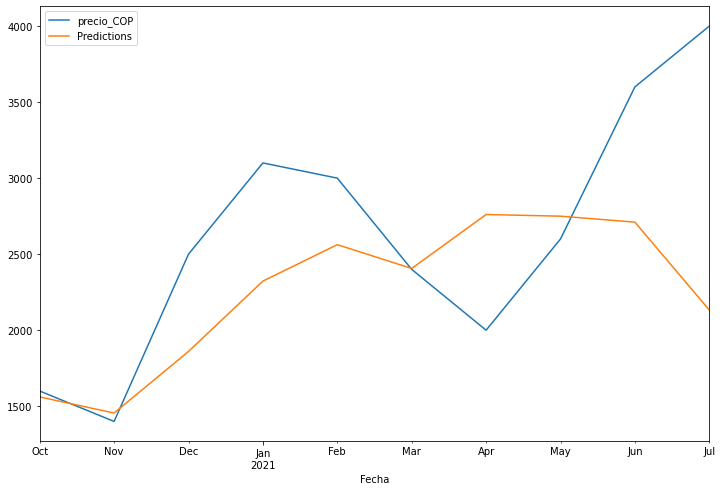

In [23]:
test.plot(figsize=(12,8))

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['precio_COP'],test['Predictions']))
print(rmse)

780.2905512717387
